In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Analysis
import os
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
#import regionmask
import pickle
import scipy.stats as stats
import glob
#import Ngl
#import Nio 
# import metpy.calc as mpc
# from metpy.units import units


In [2]:
import warnings
warnings.filterwarnings('ignore')


## Read in data 

In [7]:
# Where the files are saved (locally):
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/NoMoments-noIrrig_withCTSMmods/'
dataDir_irrig = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/NoMoments_withCTSMmods/'
dataDir_flxAvg = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/NoMoments-SrfFluxAvg_withCTSMmods/'

# File naming conventions: 
startFile       = 'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-noIrrig_startDay'  
startFile_irrig = 'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods_startDay' 
startFile_flxAvg = 'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-Irrig-SrfFluxAvg_startDay'

middleFile_CAM  = '.cam.h0.2015-'
middleFile_CLM  = '.clm2.h1.2015-'
endFile         = '-00000.nc'

# Month/day also factor into naming convention (since these are run for ~2 days and second day is used)
months    = np.ones(31)*6
months[0] = 5
days      = np.arange(0,31)
days[0]   = 31


In [8]:
# Now read in each daily file, and save the appropriate second day to an xr dataset: 

for iDay in range(29):
    
    # --------------------------------------------------------------
    # Irrigation OFF
    # --------------------------------------------------------------
    
    # Define full file names 
    camFile    = dataDir+startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CAM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
    clmFile    = dataDir+startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CLM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile

    # ---------------------- 
    # Read in CAM data
    # ----------------------
    # Read in files with homogeneous surface forcing prescribed 
    with xr.open_dataset(camFile, decode_times=True) as cam_DS:
        cam_DS['time']  = cam_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_hmg  = pd.DatetimeIndex(cam_DS['time'].values)
        iTimeStart = np.where((times_hmg.day==days[iDay+1]) & (times_hmg.hour==6))[0]
        iTimeEnd   = np.where((times_hmg.day==days[iDay+2]) & (times_hmg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            camDS = cam_DS.isel(time=iTimeRange)
        else:
            camDS = xr.concat([camDS,cam_DS.isel(time=iTimeRange)], dim='time')


    # ---------------------- 
    # Read in CLM data
    # ----------------------
    # Read in files with heterogeneous surface forcing prescribed     
    with xr.open_dataset(clmFile, decode_times=True) as clm_DS:
        clm_DS['time']  = clm_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_htg  = pd.DatetimeIndex(clm_DS['time'].values)
        iTimeStart = np.where((times_htg.day==days[iDay+1]) & (times_htg.hour==6))[0]
        iTimeEnd   = np.where((times_htg.day==days[iDay+2]) & (times_htg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            clmDS = clm_DS.isel(time=iTimeRange)
        else:
            clmDS = xr.concat([clmDS,clm_DS.isel(time=iTimeRange)], dim='time')
            
            
    # --------------------------------------------------------------
    # Irrigation ON
    # --------------------------------------------------------------
    
    # Define full file names 
    camFile_irr = dataDir_irrig+startFile_irrig+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CAM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
    clmFile_irr = dataDir_irrig+startFile_irrig+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CLM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile

    # ---------------------- 
    # Read in CAM data
    # ----------------------
    # Read in files with homogeneous surface forcing prescribed 
    with xr.open_dataset(camFile_irr, decode_times=True) as cam_DSirr:
        cam_DSirr['time']  = cam_DSirr.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_hmg  = pd.DatetimeIndex(cam_DSirr['time'].values)
        iTimeStart = np.where((times_hmg.day==days[iDay+1]) & (times_hmg.hour==6))[0]
        iTimeEnd   = np.where((times_hmg.day==days[iDay+2]) & (times_hmg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            camDS_irrig = cam_DSirr.isel(time=iTimeRange)
        else:
            camDS_irrig = xr.concat([camDS_irrig,cam_DSirr.isel(time=iTimeRange)], dim='time')


    # ---------------------- 
    # Read in CLM data
    # ----------------------
    # Read in files with heterogeneous surface forcing prescribed     
    with xr.open_dataset(clmFile_irr, decode_times=True) as clm_DSirr:
        clm_DSirr['time']  = clm_DSirr.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_htg  = pd.DatetimeIndex(clm_DSirr['time'].values)
        iTimeStart = np.where((times_htg.day==days[iDay+1]) & (times_htg.hour==6))[0]
        iTimeEnd   = np.where((times_htg.day==days[iDay+2]) & (times_htg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            clmDS_irrig = clm_DSirr.isel(time=iTimeRange)
        else:
            clmDS_irrig = xr.concat([clmDS_irrig,clm_DSirr.isel(time=iTimeRange)], dim='time')
    
    # --------------------------------------------------------------
    # Irrigation ON + srf_flux_avg
    # --------------------------------------------------------------
    
    # Define full file names 
    camFile_flxAvg = dataDir_flxAvg+startFile_flxAvg+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CAM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
    clmFile_flxAvg = dataDir_flxAvg+startFile_flxAvg+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CLM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile

    # ---------------------- 
    # Read in CAM data
    # ----------------------
    # Read in files with homogeneous surface forcing prescribed 
    with xr.open_dataset(camFile_flxAvg, decode_times=True) as cam_DSavg:
        cam_DSavg['time']  = cam_DSavg.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_hmg  = pd.DatetimeIndex(cam_DSavg['time'].values)
        iTimeStart = np.where((times_hmg.day==days[iDay+1]) & (times_hmg.hour==6))[0]
        iTimeEnd   = np.where((times_hmg.day==days[iDay+2]) & (times_hmg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            camDS_flxAvg = cam_DSavg.isel(time=iTimeRange)
        else:
            camDS_flxAvg = xr.concat([camDS_flxAvg,cam_DSavg.isel(time=iTimeRange)], dim='time')


    # ---------------------- 
    # Read in CLM data
    # ----------------------
    # Read in files with heterogeneous surface forcing prescribed     
    with xr.open_dataset(clmFile_flxAvg, decode_times=True) as clm_DSavg:
        clm_DSavg['time']  = clm_DSavg.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_htg  = pd.DatetimeIndex(clm_DSavg['time'].values)
        iTimeStart = np.where((times_htg.day==days[iDay+1]) & (times_htg.hour==6))[0]
        iTimeEnd   = np.where((times_htg.day==days[iDay+2]) & (times_htg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            clmDS_flxAvg = clm_DSavg.isel(time=iTimeRange)
        else:
            clmDS_flxAvg = xr.concat([clmDS_flxAvg,clm_DSavg.isel(time=iTimeRange)], dim='time')
    

    print('Done with day %i' % iDay)
    

Done with day 0
Done with day 1
Done with day 2
Done with day 3
Done with day 4
Done with day 5
Done with day 6
Done with day 7
Done with day 8
Done with day 9
Done with day 10
Done with day 11
Done with day 12
Done with day 13
Done with day 14
Done with day 15
Done with day 16
Done with day 17
Done with day 18
Done with day 19
Done with day 20
Done with day 21
Done with day 22
Done with day 23
Done with day 24
Done with day 25
Done with day 26
Done with day 27
Done with day 28


In [49]:
iTimeEnd

array([162, 163, 164])

In [9]:
# Also read in the IOP files from Nate:
nateHMGfile = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-hmg.nc'
nateHTGfile = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-htg.nc'

nateHMG = xr.open_dataset(nateHMGfile,decode_times=True)
nateHTG = xr.open_dataset(nateHTGfile,decode_times=True)

nateTime = pd.DatetimeIndex(nateHMG.time.values, tz='UTC')


In [10]:
# Convert times to a pandas datetime array, with UTC timezone
times = pd.DatetimeIndex(camDS.time.values, tz='UTC')

# Now convert those to Central time 
times_local = times.tz_convert(tz='US/Central') 

timesNate_local = nateTime.tz_convert(tz='US/Central')


In [11]:
# Limit the data in Nate's HydroBlocks run to period of interest 
iTime   = np.where( (timesNate_local.year==2015) &(timesNate_local.month==6) )[0]
nateHMG = nateHMG.isel(time=iTime)
nateHTG = nateHTG.isel(time=iTime)
timesNate_local=timesNate_local[iTime]


## What do surface moments look like?

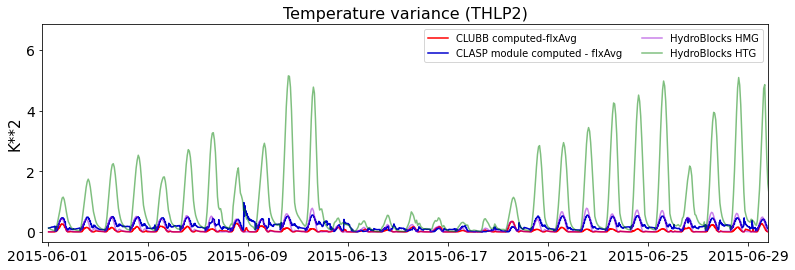

In [14]:
fig,axs = plt.subplots(1,1, figsize=(13,4))

# axs.plot(times_local, np.squeeze(camDS['THLP2_CLUBB'].values)[:,-1],'k', label='CLUBB computed')
# axs.plot(times_local, np.squeeze(clmDS['THLP2_CLUBB'].values),color='orange', label='CLASP module computed')

# axs.plot(times_local, np.squeeze(camDS_irrig['THLP2_CLUBB'].values)[:,-1],'maroon', label='CLUBB computed-irrig')
# axs.plot(times_local, np.squeeze(clmDS_irrig['THLP2_CLUBB'].values),color='teal', label='CLASP module computed - irrig')

axs.plot(times_local, np.squeeze(camDS_flxAvg['THLP2_CLUBB'].values)[:,-1],'red', label='CLUBB computed-flxAvg')
axs.plot(times_local, np.squeeze(clmDS_flxAvg['THLP2_CLUBB'].values),color='mediumblue', label='CLASP module computed - flxAvg')

axs.plot(timesNate_local, nateHMG.thlp2.values,color='darkviolet', label='HydroBlocks HMG', alpha=0.5)
axs.plot(timesNate_local, nateHTG.thlp2.values,'green', label='HydroBlocks HTG', alpha=0.5)

axs.legend(ncol=2)
axs.set_xlim(datetime.date(2015,6,1),datetime.date(2015,6,30))
#axs.set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))
#axs.set_ylim([0,1])

axs.set_ylabel('K**2',fontsize=15)
axs.set_title('Temperature variance (THLP2)', fontsize=16)

axs.tick_params(axis='both', which='major', labelsize=14)


In [15]:
print('Mean THLP2 in CLUBB:        %.3f' % np.nanmean(np.squeeze(camDS_flxAvg['THLP2_CLUBB'].values)[:,-1]) )
print('Mean THLP2 in CLASP module: %.3f' % np.nanmean(np.squeeze(clmDS_flxAvg['THLP2_CLUBB'].values)) )
print('Mean THLP2 in HydroBlocks HMG: %.3f' % np.nanmean(nateHMG.thlp2.values) )
print('Mean THLP2 in HydroBlocks HTG: %.3f' % np.nanmean(nateHTG.thlp2.values) )


Mean THLP2 in CLUBB:        0.045
Mean THLP2 in CLASP module: 0.195
Mean THLP2 in HydroBlocks HMG: 0.125
Mean THLP2 in HydroBlocks HTG: 0.941


In [19]:
np.nanmean(np.squeeze(camDS_flxAvg['RTP2_CLUBB'].values)[:,-1])

2.4710163e-08

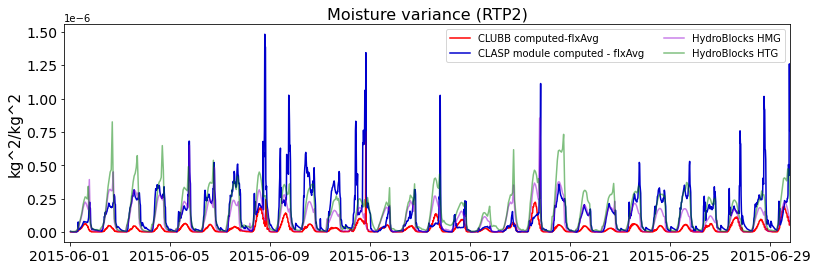

In [22]:
fig,axs = plt.subplots(1,1, figsize=(13,4))

# axs.plot(times_local, np.squeeze(camDS['THLP2_CLUBB'].values)[:,-1],'k', label='CLUBB computed')
# axs.plot(times_local, np.squeeze(clmDS['THLP2_CLUBB'].values),color='orange', label='CLASP module computed')

# axs.plot(times_local, np.squeeze(camDS_irrig['THLP2_CLUBB'].values)[:,-1],'maroon', label='CLUBB computed-irrig')
# axs.plot(times_local, np.squeeze(clmDS_irrig['THLP2_CLUBB'].values),color='teal', label='CLASP module computed - irrig')

axs.plot(times_local, np.squeeze(camDS_flxAvg['RTP2_CLUBB'].values)[:,-1],'red', label='CLUBB computed-flxAvg')
axs.plot(times_local, np.squeeze(clmDS_flxAvg['QP2_CLUBB'].values),color='mediumblue', label='CLASP module computed - flxAvg')

axs.plot(timesNate_local, nateHMG.qp2.values,color='darkviolet', label='HydroBlocks HMG', alpha=0.5)
axs.plot(timesNate_local, nateHTG.qp2.values,'green', label='HydroBlocks HTG', alpha=0.5)

axs.legend(ncol=2)
axs.set_xlim(datetime.date(2015,6,1),datetime.date(2015,6,30))
#axs.set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))
#axs.set_ylim([0,1])

axs.set_ylabel('kg^2/kg^2',fontsize=15)
axs.set_title('Moisture variance (RTP2)', fontsize=16)

axs.tick_params(axis='both', which='major', labelsize=14)



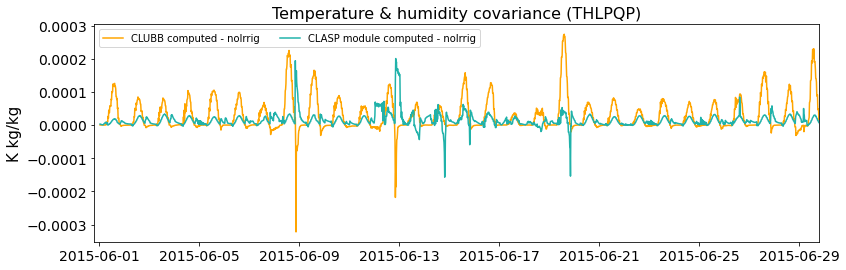

In [26]:
fig,axs = plt.subplots(1,1, figsize=(13,4))

axs.plot(times_local, np.squeeze(camDS['RTPTHLP_CLUBB'].values)[:,-1],'orange', label='CLUBB computed - noIrrig')
axs.plot(times_local, np.squeeze(clmDS['THLPQP_CLUBB'].values),color='lightseagreen', label='CLASP module computed - noIrrig')

# axs.plot(times_local, np.squeeze(camDS_irrig['RTPTHLP_CLUBB'].values)[:,-1],'maroon', label='CLUBB computed-irrig')
# axs.plot(times_local, np.squeeze(clmDS_irrig['THLPQP_CLUBB'].values),color='teal', label='CLASP module computed - irrig')

# axs.plot(times_local, np.squeeze(camDS_flxAvg['RTPTHLP_CLUBB'].values)[:,-1],'red', label='CLUBB computed-flxAvg')
# axs.plot(times_local, np.squeeze(clmDS_flxAvg['THLPQP_CLUBB'].values),color='mediumblue', label='CLASP module computed - flxAvg')

# axs.plot(timesNate_local, nateHMG.thlpqp.values,color='darkviolet', label='HydroBlocks HMG', alpha=0.5)
# axs.plot(timesNate_local, nateHTG.thlpqp.values,'green', label='HydroBlocks HTG', alpha=0.5)

axs.legend(ncol=2)
axs.set_xlim(datetime.date(2015,6,1),datetime.date(2015,6,30))
#axs.set_xlim(datetime.date(2015,6,5),datetime.date(2015,6,9))
#axs.set_ylim([0,1])

axs.set_ylabel('K kg/kg',fontsize=15)
axs.set_title('Temperature & humidity covariance (THLPQP)', fontsize=16)

axs.tick_params(axis='both', which='major', labelsize=14)



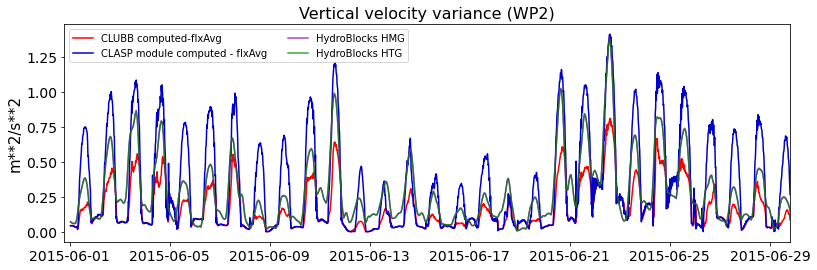

In [11]:
fig,axs = plt.subplots(1,1, figsize=(13,4))

# axs.plot(times_local, np.squeeze(camDS['WP2_CLUBB'].values)[:,-1],'k', label='CLUBB computed')
# axs.plot(times_local, np.squeeze(clmDS['WP2_CLUBB'].values),color='orange', label='CLASP module computed')

# axs.plot(times_local, np.squeeze(camDS_irrig['WP2_CLUBB'].values)[:,-1],'maroon', label='CLUBB computed-irrig')
# axs.plot(times_local, np.squeeze(clmDS_irrig['WP2_CLUBB'].values),color='teal', label='CLASP module computed - irrig')

axs.plot(times_local, np.squeeze(camDS_flxAvg['WP2_CLUBB'].values)[:,-1],'red', label='CLUBB computed-flxAvg')
axs.plot(times_local, np.squeeze(clmDS_flxAvg['WP2_CLUBB'].values),color='mediumblue', label='CLASP module computed - flxAvg')

axs.plot(timesNate_local, nateHMG.wp2.values,color='darkviolet', label='HydroBlocks HMG', alpha=0.75)
axs.plot(timesNate_local, nateHTG.wp2.values,color='green',        label='HydroBlocks HTG', alpha=0.75)

axs.legend(ncol=2)
axs.set_xlim(datetime.date(2015,6,1),datetime.date(2015,6,30))
#axs.set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))

axs.set_ylabel('m**2/s**2',fontsize=15)
axs.set_title('Vertical velocity variance (WP2)', fontsize=16)

axs.tick_params(axis='both', which='major', labelsize=14)



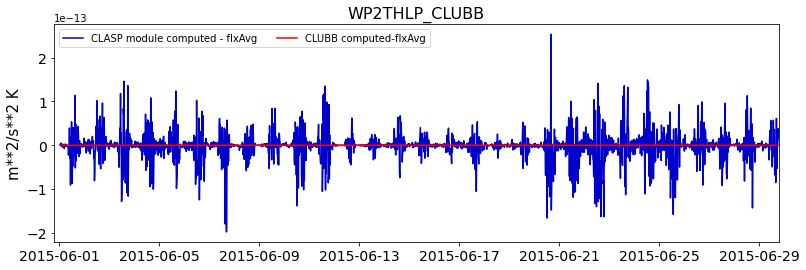

In [75]:
fig,axs = plt.subplots(1,1, figsize=(13,4))

# axs.plot(times_local, np.squeeze(clmDS['WP2THLP_CLUBB'].values),color='orange', label='CLASP module computed')
# axs.plot(times_local, np.squeeze(camDS['WP2THLP_CLUBB'].values)[:,-1],'k', label='CLUBB computed')

# axs.plot(times_local, np.squeeze(camDS_irrig['WP2THLP_CLUBB'].values)[:,-1],'maroon', label='CLUBB computed-irrig')
# axs.plot(times_local, np.squeeze(clmDS_irrig['WP2THLP_CLUBB'].values),color='teal', label='CLASP module computed - irrig'

axs.plot(times_local, np.squeeze(clmDS_flxAvg['WP2THLP_CLUBB'].values),color='mediumblue', label='CLASP module computed - flxAvg')
axs.plot(times_local, np.squeeze(camDS_flxAvg['WP2THLP_CLUBB'].values)[:,-1],'red', label='CLUBB computed-flxAvg')

# axs.plot(timesNate_local, nateHMG.wp2thetap.values,color='deeppink', label='HydroBlocks HMG', alpha=0.5)
# axs.plot(timesNate_local, nateHTG.wp2thetap.values,'b', label='HydroBlocks HTG', alpha=0.5)

axs.legend(ncol=2)
axs.set_xlim(datetime.date(2015,6,1),datetime.date(2015,6,30))
#axs.set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))

axs.set_ylabel('m**2/s**2 K',fontsize=15)
axs.set_title('WP2THLP_CLUBB', fontsize=16)

axs.tick_params(axis='both', which='major', labelsize=14)



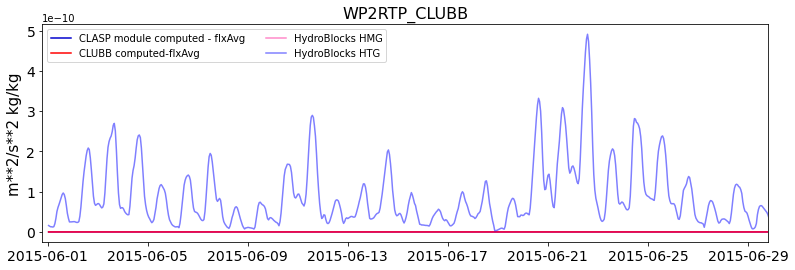

In [77]:
fig,axs = plt.subplots(1,1, figsize=(13,4))

# axs.plot(times_local, np.squeeze(clmDS['WP2RTP_CLUBB'].values),color='orange', label='CLASP module computed')
# axs.plot(times_local, np.squeeze(camDS['WP2QP_CLUBB'].values)[:,-1],'k', label='CLUBB computed')

# axs.plot(times_local, np.squeeze(camDS_irrig['WP2THLP_CLUBB'].values)[:,-1],'maroon', label='CLUBB computed-irrig')
# axs.plot(times_local, np.squeeze(clmDS_irrig['WP2THLP_CLUBB'].values),color='teal', label='CLASP module computed - irrig'

axs.plot(times_local, np.squeeze(clmDS_flxAvg['WP2QP_CLUBB'].values),color='mediumblue', label='CLASP module computed - flxAvg')
axs.plot(times_local, np.squeeze(camDS_flxAvg['WP2RTP_CLUBB'].values)[:,-1],'red', label='CLUBB computed-flxAvg')

axs.plot(timesNate_local, nateHMG.wp2qp.values,color='deeppink', label='HydroBlocks HMG', alpha=0.5)
axs.plot(timesNate_local, nateHTG.wp2qp.values,'b', label='HydroBlocks HTG', alpha=0.5)

axs.legend(ncol=2)
axs.set_xlim(datetime.date(2015,6,1),datetime.date(2015,6,30))
#axs.set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))

axs.set_ylabel('m**2/s**2 kg/kg',fontsize=15)
axs.set_title('WP2RTP_CLUBB', fontsize=16)

axs.tick_params(axis='both', which='major', labelsize=14)




## Understand negative thlpqp?

In [ ]:
# Get list of log files (in time order)
#   Note: the second day (in local time) starts at timestep=90 



In [12]:
# Associated clm file

clmExtend    = dataDir_flxAvg+'FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-Irrig-SrfFluxAvg_startDay0601.clm2.h1.2015-06-01-00000.nc'
clmExtend_DS = xr.open_dataset(clmExtend, decode_times=True)
clmExtend_DS['time']  = clmExtend_DS.indexes['time'].to_datetimeindex()

times_hmg  = pd.DatetimeIndex(clmExtend_DS['time'].values)
iTimeStart = np.where((times_hmg.day==1) & (times_hmg.hour==6))[0]
iTimeEnd   = np.where((times_hmg.day==2) & (times_hmg.hour==6))[0]
iTimeRange = np.arange(iTimeStart[0],iTimeEnd[-1])

clmExtend_DS = clmExtend_DS.isel(time=iTimeRange)


In [42]:
dataDir_flxAvg

'/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/NoMoments-SrfFluxAvg_withCTSMmods/'

In [43]:
iTimeEnd

array([90, 91, 92, 93])

In [13]:
logFile = dataDir_flxAvg+'lnd.log.210305-125837'

with open(logFile) as f:
    lines = f.readlines()
    
patchWeights = []
patchType    = []

patch_ustar  = []
patch_zeta   = []

patch_theta  = []
patch_q      = []
patch_thlpqp = []


for iLines in range(len(lines)):
    # Get patch weight and type 
    if lines[iLines].startswith(' MDF: patch weight')==True:
        strArr = lines[iLines].split(':')
        weights = strArr[2].split('\n')
        patchWeights = np.append(patchWeights,float(weights[0]))
        
    if lines[iLines].startswith(' MDF: patch type...')==True:
        strArr = lines[iLines].split('...')
        patchInd = strArr[1].split('\n')
        patchType = np.append(patchType,float(patchInd[0]))
        
    # Get patch levle variable values 
    if lines[iLines].startswith(' MDF:   ustar(p)')==True:
        strArr      = lines[iLines].split('=')
        ustar       = strArr[1].split('\n')
        patch_ustar = np.append(patch_ustar, float(ustar[0]))  
        
    if lines[iLines].startswith(' MDF:   zeta(p)')==True:
        strArr     = lines[iLines].split('=')
        zeta       = strArr[1].split('\n')
        patch_zeta = np.append(patch_zeta, float(zeta[0]))  
        
        
    # Wrote out some variables twice, so avoid double counting
    if lines[iLines].startswith(' MDF:  patch value of thlpqp')==True:
        strArr = lines[iLines].split(':')
        thlpqp      = strArr[2].split('\n')
        patch_thlpqp = np.append(patch_thlpqp, float(thlpqp[0]))
        
        tv_strArr   = lines[iLines+1].split(':')
        theta       = tv_strArr[1].split('\n')
        patch_theta = np.append(patch_theta, float(theta[0]))
        
        q_strArr = lines[iLines+3].split(':')
        q      = q_strArr[1].split('\n')
        patch_q = np.append(patch_q, float(q[0]))


# Reshape to be timestep x patch (confirmed this works for one land log file)
patch_thlpqp = np.reshape(patch_thlpqp, [217,17])
patch_q      = np.reshape(patch_q, [217,17])
patch_theta  = np.reshape(patch_theta, [217,17])
patch_zeta   = np.reshape(patch_zeta, [217,17])
patch_ustar  = np.reshape(patch_ustar, [217,17])

# Look only at the second day [local time, starts at time index = 90, ends at time index=164]
patch_thlpqp = patch_thlpqp[iTimeStart[0]:(iTimeEnd[-1]),:]
patch_q      = patch_q[iTimeStart[0]:(iTimeEnd[-1]),:]
patch_theta  = patch_theta[iTimeStart[0]:(iTimeEnd[-1]),:]
patch_zeta   = patch_zeta[iTimeStart[0]:(iTimeEnd[-1]),:]
patch_ustar  = patch_ustar[iTimeStart[0]:(iTimeEnd[-1]),:]

# For patch type and weight, those should be constant in time, take only first set
patchType     = np.reshape(patchType, [217,17])
patchWeights  = np.reshape(patchWeights, [217,17])

patchType = patchType[0,:]
patchWeights = patchWeights[0,:]



In [14]:
# If want to sort by weight...

indSort = np.argsort(patchWeights)
indSort[::-1]   # To sort from largest to smallest 

patchWeight_sort = patchWeights[indSort[::-1]]
patchType_sort   = patchType[indSort[::-1]]

patch_thlpqp_sort = patch_thlpqp[:, indSort[::-1] ]
patch_q_sort = patch_q[:, indSort[::-1] ]
patch_theta_sort = patch_theta[:, indSort[::-1] ]
patch_zeta_sort = patch_zeta[:, indSort[::-1] ]
patch_ustar_sort = patch_ustar[:, indSort[::-1] ]


In [15]:
print('Patch Type      Patch Weight')
print('----------      ------------')

for iPatch in range(len(patchType_sort)):
    print('%6i  %14.6f' % (patchType_sort[iPatch], patchWeight_sort[iPatch]))


Patch Type      Patch Weight
----------      ------------
    15        0.487411
    13        0.255558
    14        0.221671
    16        0.022555
     7        0.006572
     0        0.003237
     1        0.001464
     0        0.000757
     0        0.000252
     0        0.000252
     0        0.000126
     0        0.000126
     0        0.000009
     0        0.000003
     0        0.000003
     0        0.000002
     0        0.000001


In [17]:
np.sum(patchWeight_sort[0:7])

0.9984682389015238

In [47]:
# What is grid mean theta at each time step? 
gridMeanTheta_sort = (np.sum(patch_theta_sort*patchWeight_sort,axis=1)/np.sum(patchWeight_sort))
gridMeanQ_sort     = (np.sum(patch_q_sort*patchWeight_sort,axis=1)/np.sum(patchWeight_sort))
gridMeanThlqp_sort = (np.sum(patch_thlpqp_sort*patchWeight_sort,axis=1)/np.sum(patchWeight_sort))


In [48]:
# The covariance term is based off of deviations from gridcell means
patchQdiff     = np.full([np.shape(gridMeanQ_sort)[0], len(patchWeights)], np.nan)
patchThetaDiff = np.full([np.shape(gridMeanQ_sort)[0], len(patchWeights)], np.nan)

for iPatch in range(len(patchWeights)):
    patchQdiff[:,iPatch]     = patch_q_sort[:,iPatch]     - gridMeanQ_sort 
    patchThetaDiff[:,iPatch] = patch_theta_sort[:,iPatch] - gridMeanTheta_sort

# The variance that's added on: 
patchVariance = patchThetaDiff * patchQdiff

gridMeanVariance = (np.sum(patchVariance*patchWeight_sort,axis=1)/np.sum(patchWeight_sort))


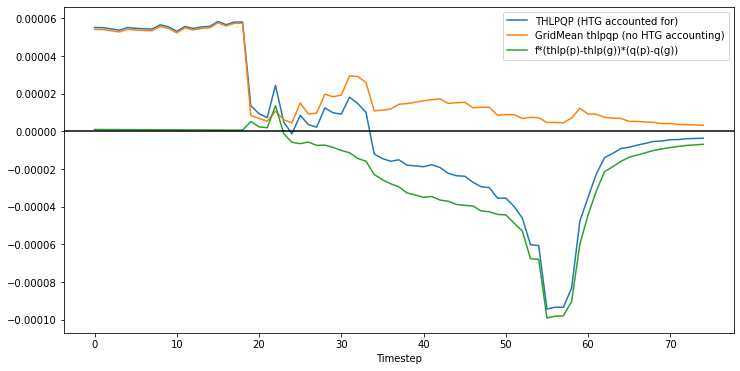

In [49]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))

ax1.plot(np.squeeze(clmExtend_DS['THLPQP_CLUBB'].values), label='THLPQP (HTG accounted for)')
ax1.plot(np.squeeze(clmExtend_DS['THLPQP_CLUBB'].values)-gridMeanVariance, label='GridMean thlpqp (no HTG accounting)')
ax1.plot(gridMeanVariance,label='f*(thlp(p)-thlp(g))*(q(p)-q(g))')

ax1.axhline(0,color='k')
ax1.set_xlabel('Timestep')

ax1.legend()
         

(20.0, 75.0)

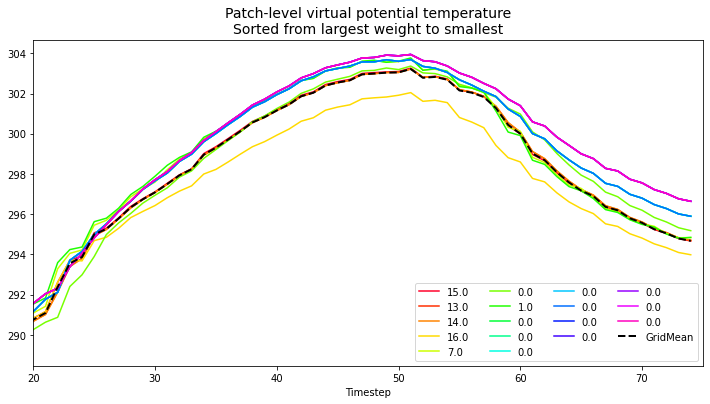

In [50]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))

n = 17
colors = plt.cm.gist_rainbow(np.linspace(0,1,n))

for iPatch in range(17):
    ax1.plot(patch_theta_sort[:,iPatch],color=colors[iPatch],label=patchType_sort[iPatch])
ax1.plot(gridMeanTheta_sort,color='k',linewidth='2',linestyle='--',label='GridMean')
ax1.legend(ncol=4) 

ax1.set_title('Patch-level virtual potential temperature\nSorted from largest weight to smallest', fontsize=14)
ax1.set_xlabel('Timestep')
    
ax1.set_xlim([20,75])


(0.0088, 0.0093)

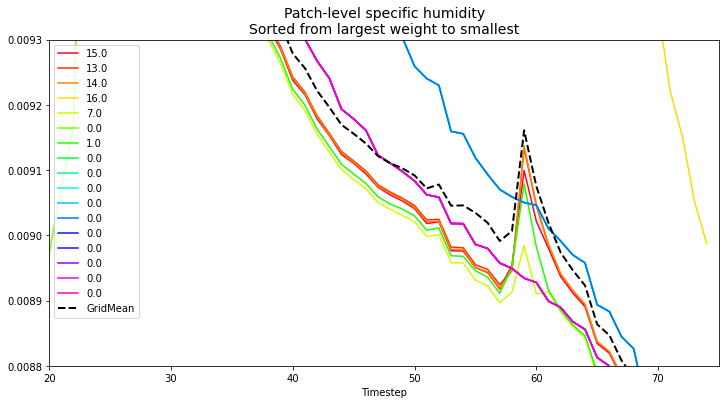

In [56]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))

n = 17
colors = plt.cm.gist_rainbow(np.linspace(0,1,n))

for iPatch in range(17):
    ax1.plot(patch_q_sort[:,iPatch],color=colors[iPatch],label=patchType_sort[iPatch])
ax1.plot(gridMeanQ_sort,color='k',linewidth='2',linestyle='--',label='GridMean')
ax1.legend() 

ax1.set_title('Patch-level specific humidity\nSorted from largest weight to smallest', fontsize=14)
ax1.set_xlabel('Timestep')


ax1.set_xlim([20,75])

#ax1.set_ylim([0.0072,0.0080])   # land log file: 05/31
ax1.set_ylim([0.0088,0.0093])    # land log file: 06/01


(20.0, 75.0)

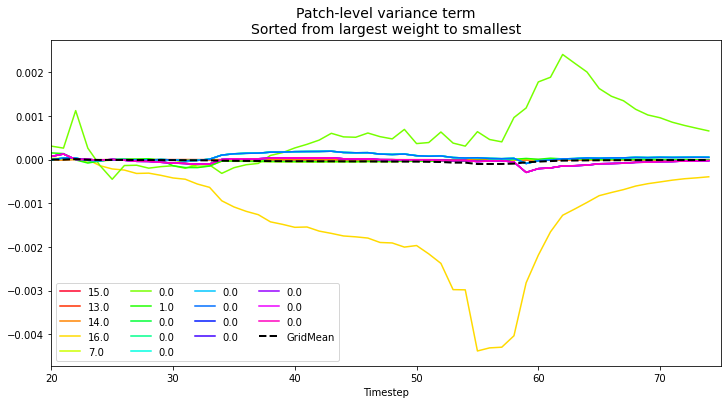

In [52]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))

n = 17
colors = plt.cm.gist_rainbow(np.linspace(0,1,n))

for iPatch in range(17):
    ax1.plot(patchVariance[:,iPatch],color=colors[iPatch],label=patchType_sort[iPatch])
ax1.plot(gridMeanVariance,color='k',linewidth='2',linestyle='--',label='GridMean')
ax1.legend(ncol=4) 

ax1.set_title('Patch-level variance term\nSorted from largest weight to smallest', fontsize=14)
ax1.set_xlabel('Timestep')
    
ax1.set_xlim([20,75])



(20.0, 75.0)

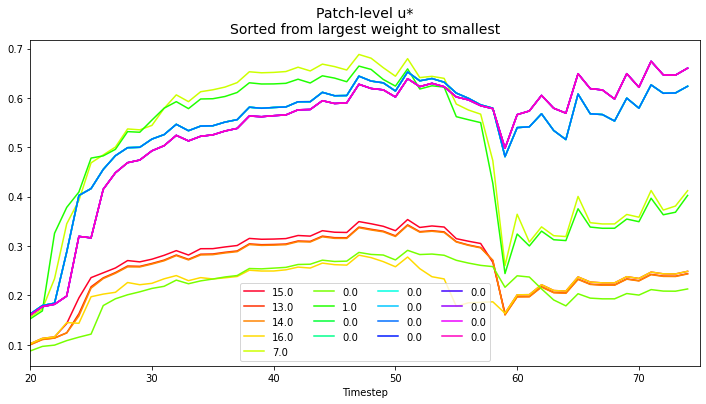

In [53]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))

n = 17
colors = plt.cm.gist_rainbow(np.linspace(0,1,n))

for iPatch in range(17):
    ax1.plot(patch_ustar_sort[:,iPatch],color=colors[iPatch],label=patchType_sort[iPatch])
ax1.legend(ncol=4) 

ax1.set_title('Patch-level u*\nSorted from largest weight to smallest', fontsize=14)
ax1.set_xlabel('Timestep')
    
ax1.set_xlim([20,75])



(20.0, 75.0)

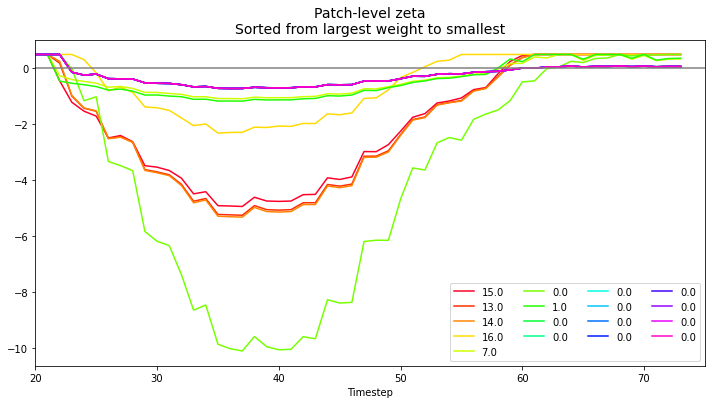

In [161]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))

n = 17
colors = plt.cm.gist_rainbow(np.linspace(0,1,n))

for iPatch in range(17):
    ax1.plot(patch_zeta_sort[:,iPatch],color=colors[iPatch],label=patchType_sort[iPatch])
ax1.legend(ncol=4) 
ax1.axhline(0,color='grey')

ax1.set_title('Patch-level zeta\nSorted from largest weight to smallest', fontsize=14)
ax1.set_xlabel('Timestep')
    
ax1.set_xlim([20,75])




## Dig into noise issue?

In [13]:
# Use metpy to compute theta at the surface 
theta = mpc.potential_temperature(camDS['PS'].values * units.pascals, camDS['TREFHT'].values * units.kelvin)

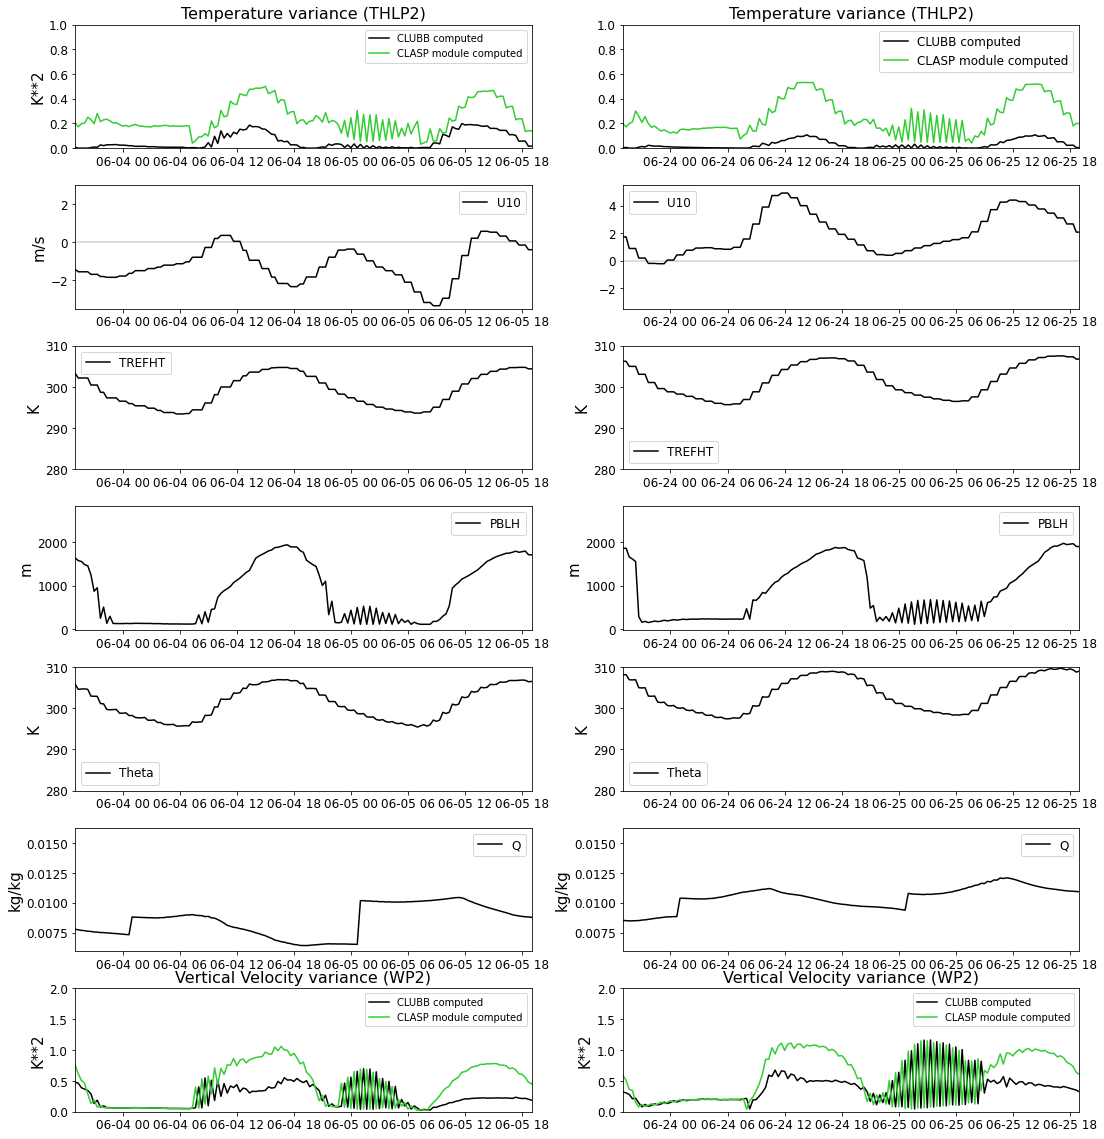

In [16]:
fig, axs_all = plt.subplots(7,2, figsize=(18, 20),
                     facecolor='w', edgecolor='k')
axs = axs_all.ravel()
fig.subplots_adjust(hspace=0.3)

## ---- Plot the case of June 4th-5th 
axs[0].plot(times_local, np.squeeze(camDS['THLP2_CLUBB'].values)[:,-1],'k', label='CLUBB computed')
axs[0].plot(times_local, np.squeeze(clmDS['THLP2_CLUBB'].values),color='limegreen', label='CLASP module computed')
axs[0].legend()
axs[0].set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))
axs[0].set_ylim([0,1])
axs[0].set_ylabel('K**2',fontsize=15)
axs[0].set_title('Temperature variance (THLP2)', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=12)

axs[2].axhline(0,color='lightgray')
axs[2].plot(times_local, np.squeeze(camDS['U10'].values),'k',label='U10')
axs[2].legend(fontsize=12)
axs[2].set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))
axs[2].set_ylim([-3.5,3])
axs[2].set_ylabel('m/s',fontsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=12)

axs[4].plot(times_local, np.squeeze(camDS['TREFHT'].values),'k',label='TREFHT')
axs[4].legend(fontsize=12)
axs[4].set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))
axs[4].set_ylim([280,310])
axs[4].set_ylabel('K',fontsize=15)
axs[4].tick_params(axis='both', which='major', labelsize=12)

axs[6].plot(times_local, np.squeeze(camDS['PBLH'].values),'k',label='PBLH')
axs[6].legend(fontsize=12)
axs[6].set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))
#axs[6].set_ylim([280,310])
axs[6].set_ylabel('m',fontsize=15)
axs[6].tick_params(axis='both', which='major', labelsize=12)

axs[8].plot(times_local, np.squeeze(theta),'k',label='Theta')
axs[8].legend(fontsize=12)
axs[8].set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))
axs[8].set_ylim([280,310])
axs[8].set_ylabel('K',fontsize=15)
axs[8].tick_params(axis='both', which='major', labelsize=12)

axs[10].plot(times_local, np.squeeze(camDS['Q'].values)[:,-1],'k',label='Q')
axs[10].legend(fontsize=12)
axs[10].set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))
#axs[10].set_ylim([280,310])
axs[10].set_ylabel('kg/kg',fontsize=15)
axs[10].tick_params(axis='both', which='major', labelsize=12)

axs[12].plot(times_local, np.squeeze(camDS['WP2_CLUBB'].values)[:,-1],'k', label='CLUBB computed')
axs[12].plot(times_local, np.squeeze(clmDS['WP2_CLUBB'].values),color='limegreen', label='CLASP module computed')
axs[12].legend()
axs[12].set_xlim(datetime.date(2015,6,4),datetime.date(2015,6,6))
axs[12].set_ylim([0,2])
axs[12].set_ylabel('K**2',fontsize=15)
axs[12].set_title('Vertical Velocity variance (WP2)', fontsize=16)
axs[12].tick_params(axis='both', which='major', labelsize=12)

# -------------------------------------
## ---- Plot the case of June 24th-25th
# -------------------------------------
axs[1].plot(times_local, np.squeeze(camDS['THLP2_CLUBB'].values)[:,-1],'k', label='CLUBB computed')
axs[1].plot(times_local, np.squeeze(clmDS['THLP2_CLUBB'].values),color='limegreen', label='CLASP module computed')
axs[1].legend(fontsize=12)
axs[1].set_xlim(datetime.date(2015,6,24),datetime.date(2015,6,26))
axs[1].set_ylim([0,1])
axs[1].set_title('Temperature variance (THLP2)', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=12)

axs[3].axhline(0,color='lightgray')
axs[3].plot(times_local, np.squeeze(camDS['U10'].values),'k',label='U10')
axs[3].legend(fontsize=12)
axs[3].set_xlim(datetime.date(2015,6,24),datetime.date(2015,6,26))
axs[3].set_ylim([-3.5,5.5])
axs[3].tick_params(axis='both', which='major', labelsize=12)

axs[5].plot(times_local, np.squeeze(camDS['TREFHT'].values),'k',label='TREFHT')
axs[5].legend(fontsize=12)
axs[5].set_xlim(datetime.date(2015,6,24),datetime.date(2015,6,26))
axs[5].set_ylim([280,310])
axs[5].set_ylabel('K',fontsize=15)
axs[5].tick_params(axis='both', which='major', labelsize=12)

axs[7].plot(times_local, np.squeeze(camDS['PBLH'].values),'k',label='PBLH')
axs[7].legend(fontsize=12)
axs[7].set_xlim(datetime.date(2015,6,24),datetime.date(2015,6,26))
#axs[7].set_ylim([280,310])
axs[7].set_ylabel('m',fontsize=15)
axs[7].tick_params(axis='both', which='major', labelsize=12)

axs[9].plot(times_local, np.squeeze(theta),'k',label='Theta')
axs[9].legend(fontsize=12)
axs[9].set_xlim(datetime.date(2015,6,24),datetime.date(2015,6,26))
axs[9].set_ylim([280,310])
axs[9].set_ylabel('K',fontsize=15)
axs[9].tick_params(axis='both', which='major', labelsize=12)

axs[11].plot(times_local, np.squeeze(camDS['Q'].values)[:,-1],'k',label='Q')
axs[11].legend(fontsize=12)
axs[11].set_xlim(datetime.date(2015,6,24),datetime.date(2015,6,26))
#axs[11].set_ylim([280,310])
axs[11].set_ylabel('kg/kg',fontsize=15)
axs[11].tick_params(axis='both', which='major', labelsize=12)

axs[13].plot(times_local, np.squeeze(camDS['WP2_CLUBB'].values)[:,-1],'k', label='CLUBB computed')
axs[13].plot(times_local, np.squeeze(clmDS['WP2_CLUBB'].values),color='limegreen', label='CLASP module computed')
axs[13].legend()
axs[13].set_xlim(datetime.date(2015,6,24),datetime.date(2015,6,26))
axs[13].set_ylim([0,2])
axs[13].set_ylabel('K**2',fontsize=15)
axs[13].set_title('Vertical Velocity variance (WP2)', fontsize=16)
axs[13].tick_params(axis='both', which='major', labelsize=12)


### Compare to 32 levels

In [18]:
cam32_file = '~/Documents/Analysis/CLASP/SCAM_runs/TempFiles/FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-32lev_startDay0604.cam.h0.2015-06-04-00000.nc'
cam64_file = '~/Documents/Analysis/CLASP/SCAM_runs/TempFiles/FSCAM.T42_T42.arm97.clasp_useAndre_noMomentsWithCTSMmods-64lev_startDay0604.cam.h0.2015-06-04-00000.nc'

camDS_32 = xr.open_dataset(cam32_file, decode_times=True)
camDS_64 = xr.open_dataset(cam64_file, decode_times=True)


In [42]:
# Use metpy to compute theta at the surface 
theta32 = mpc.potential_temperature(camDS_32['PS'].values * units.pascals, camDS_32['TREFHT'].values * units.kelvin)

theta64 = mpc.potential_temperature(camDS_64['PS'].values * units.pascals, camDS_64['TREFHT'].values * units.kelvin)


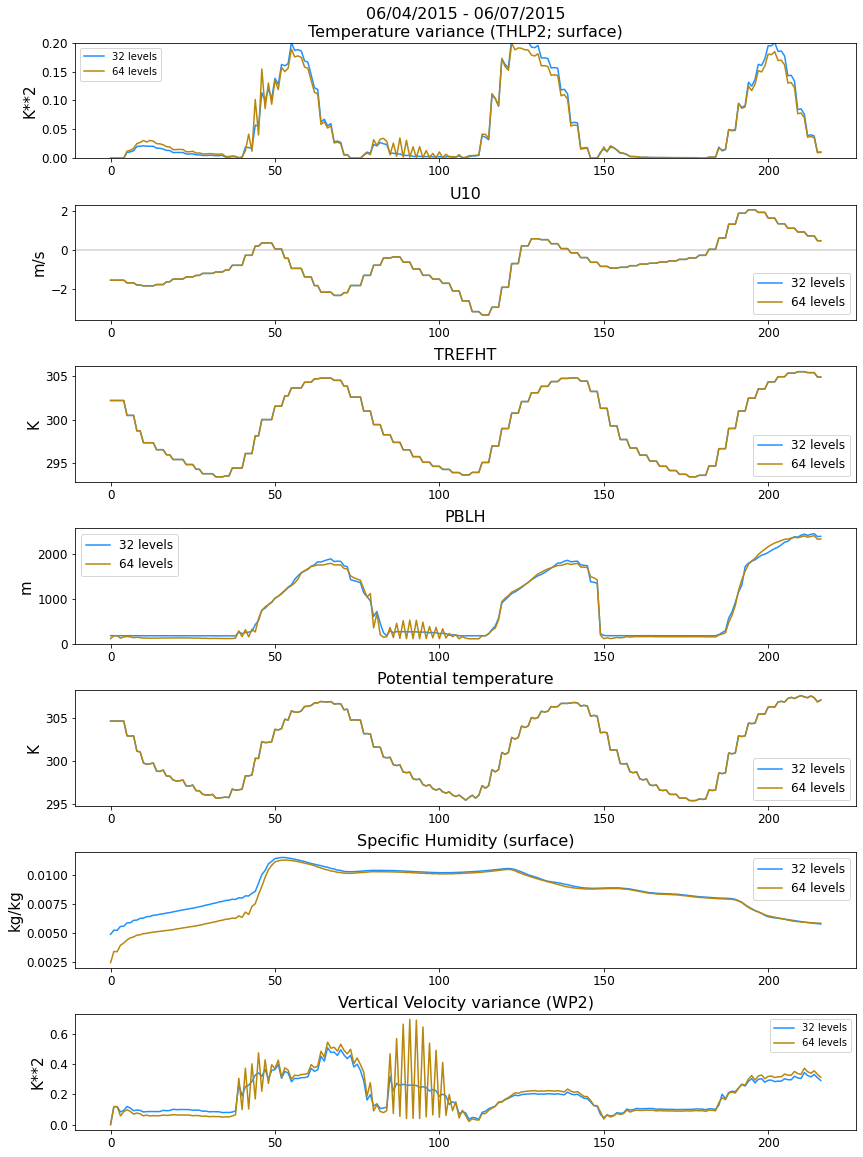

In [44]:
fig, axs_all = plt.subplots(7,1, figsize=(14, 20),
                     facecolor='w', edgecolor='k')
axs = axs_all.ravel()
fig.subplots_adjust(hspace=0.4)

## ---- Plot the case of June 4th-5th 
axs[0].plot(np.squeeze(camDS_32['THLP2_CLUBB'].values)[:,-1],color='dodgerblue', label='32 levels')
axs[0].plot(np.squeeze(camDS_64['THLP2_CLUBB'].values)[:,-1],color='darkgoldenrod', label='64 levels')
axs[0].legend()
axs[0].set_ylim([0,0.2])
axs[0].set_ylabel('K**2',fontsize=15)
axs[0].set_title('06/04/2015 - 06/07/2015\nTemperature variance (THLP2; surface)', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=12)

axs[1].axhline(0,color='lightgray')
axs[1].plot(np.squeeze(camDS_32['U10'].values),color='dodgerblue', label='32 levels')
axs[1].plot(np.squeeze(camDS_64['U10'].values),color='darkgoldenrod', label='64 levels')
axs[1].legend(fontsize=12)
#axs[1].set_ylim([-3.5,3])
axs[1].set_ylabel('m/s',fontsize=15)
axs[1].set_title('U10', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=12)

axs[2].plot(np.squeeze(camDS_32['TREFHT'].values),color='dodgerblue', label='32 levels')
axs[2].plot(np.squeeze(camDS_64['TREFHT'].values),color='darkgoldenrod', label='64 levels')
axs[2].legend(fontsize=12)
# axs[2].set_ylim([280,310])
axs[2].set_ylabel('K',fontsize=15)
axs[2].set_title('TREFHT', fontsize=16)
axs[2].tick_params(axis='both', which='major', labelsize=12)

axs[3].plot(np.squeeze(camDS_32['PBLH'].values),color='dodgerblue', label='32 levels')
axs[3].plot(np.squeeze(camDS_64['PBLH'].values),color='darkgoldenrod', label='64 levels')
axs[3].legend(fontsize=12)
#axs[6].set_ylim([280,310])
axs[3].set_ylabel('m',fontsize=15)
axs[3].set_title('PBLH', fontsize=16)
axs[3].tick_params(axis='both', which='major', labelsize=12)

axs[4].plot(np.squeeze(theta32),color='dodgerblue',label='32 levels')
axs[4].plot(np.squeeze(theta64),color='darkgoldenrod',label='64 levels')
axs[4].legend(fontsize=12)
axs[4].set_ylabel('K',fontsize=15)
axs[4].set_title('Potential temperature', fontsize=16)
axs[4].tick_params(axis='both', which='major', labelsize=12)

axs[5].plot(np.squeeze(camDS_32['Q'].values)[:,-1],color='dodgerblue', label='32 levels')
axs[5].plot(np.squeeze(camDS_64['Q'].values)[:,-1],color='darkgoldenrod', label='64 levels')
axs[5].legend(fontsize=12)
axs[5].set_ylabel('kg/kg',fontsize=15)
axs[5].set_title('Specific Humidity (surface)', fontsize=16)
axs[5].tick_params(axis='both', which='major', labelsize=12)

axs[6].plot(np.squeeze(camDS_32['WP2_CLUBB'].values)[:,-1],color='dodgerblue', label='32 levels')
axs[6].plot(np.squeeze(camDS_64['WP2_CLUBB'].values)[:,-1],color='darkgoldenrod', label='64 levels')
axs[6].legend()
axs[6].set_ylabel('K**2',fontsize=15)
axs[6].set_title('Vertical Velocity variance (WP2)', fontsize=16)
axs[6].tick_params(axis='both', which='major', labelsize=12)



## Combine clubb moments into a new HTG forcing file

In [17]:
# Read in CLM data, but leave 5/31 attached

for iDay in range(29):
    
    # Define full file names 
    clmFile    = dataDir_flxAvg+startFile_flxAvg+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_CLM+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile

    # ---------------------- 
    # Read in CLM data
    # ----------------------
    # Read in files with heterogeneous surface forcing prescribed     
    with xr.open_dataset(clmFile, decode_times=True) as clm_DS:
        clm_DS['time']  = clm_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_htg  = pd.DatetimeIndex(clm_DS['time'].values)
        iTimeStart = np.where((times_htg.day==days[iDay+1]) & (times_htg.hour==6))[0]
        iTimeEnd   = np.where((times_htg.day==days[iDay+2]) & (times_htg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            iTimeRange = np.arange(0,iTimeEnd[0])
            clmDS_extend = clm_DS.isel(time=iTimeRange)
        else:
            clmDS_extend = xr.concat([clmDS_extend,clm_DS.isel(time=iTimeRange)], dim='time')
    

    print('Done with day %i' % iDay)
    

Done with day 0
Done with day 1
Done with day 2
Done with day 3
Done with day 4
Done with day 5
Done with day 6
Done with day 7
Done with day 8
Done with day 9
Done with day 10
Done with day 11
Done with day 12
Done with day 13
Done with day 14
Done with day 15
Done with day 16
Done with day 17
Done with day 18
Done with day 19
Done with day 20
Done with day 21
Done with day 22
Done with day 23
Done with day 24
Done with day 25
Done with day 26
Done with day 27
Done with day 28


In [18]:
# Read in old forcing file: 
nateHTG_file = '~/Documents/Analysis/CLASP/NateForcing/clasp-htg.bdate.nc'
nateHTG_orig = xr.open_dataset(nateHTG_file, decode_times=True,engine='netcdf4')

# Times to use... 
iTime   = np.where( (nateHTG_orig.time.values>=clmDS_extend.time.values[0]) & 
          (nateHTG_orig.time.values<=clmDS_extend.time.values[-1]) )[0]

nateHTG_orig = nateHTG_orig.isel(time=iTime)


One issue: Nate's forcing is hourly; time step level output from CLM is every 20 minutes. So two obvious options are to either interpolate the forcing down to 20 minute levels, or to average the CLUBB moments up to hourly. For the first pass, I'll do the latter.

In [19]:
# Get hourly mean CLM values (includes CLUBB output)
#   Gets assigned to hour the average *starts*
hourlyCLM = clmDS_extend.resample(time='1H').mean()


Now we can merge the moments computed in CLM into a new hybrid file that uses the atmospheric fields from HMG but the moments from the CLASP module in CTSM. Just need to ensure units match up.

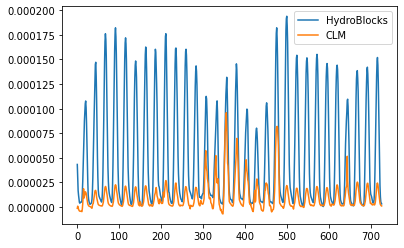

In [20]:
# Look at plot comparisons
plt.plot(np.squeeze(nateHTG_orig.wpqtp_sfc.values))
plt.plot(np.squeeze(hourlyCLM.WPQP_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])


In [21]:
# WPQTP_CLUBB: 
#   kg/kg m/s in Nate's file 
#   same in CLM output
nateHTG_orig['wpqtp_sfc'].values = hourlyCLM.WPQP_CLUBB.values 


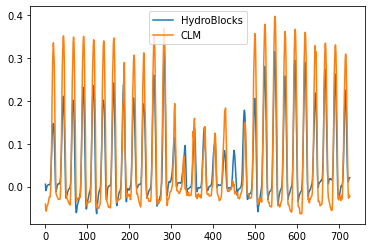

In [22]:
plt.plot(np.squeeze(nateHTG_orig.wpthlp_sfc.values))
plt.plot(np.squeeze(hourlyCLM.WPTHLP_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])

In [23]:
# WPTHLP_CLUBB
#  (kg/kg m/s) in Nate's file
#  Same in CLM output
nateHTG_orig['wpthlp_sfc'].values = hourlyCLM.WPTHLP_CLUBB.values 


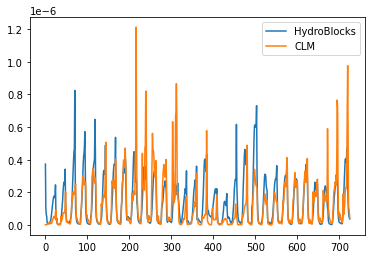

In [24]:
plt.plot(np.squeeze(nateHTG_orig.qp2.values))
plt.plot(np.squeeze(hourlyCLM.QP2_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])

In [25]:
# QP2_CLUBB
#  (kg2/kg2) in Nate's file
#  Same in CLM output
nateHTG_orig['qp2'].values = hourlyCLM.QP2_CLUBB.values 


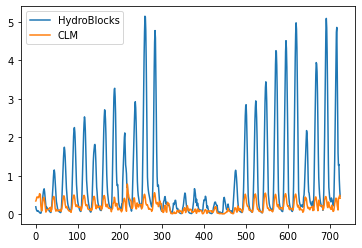

In [26]:
plt.plot(np.squeeze(nateHTG_orig.thlp2.values))
plt.plot(np.squeeze(hourlyCLM.THLP2_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])

In [27]:
# THLP2_CLUBB
#   K2 in both 
nateHTG_orig['thlp2'].values = hourlyCLM.THLP2_CLUBB.values 


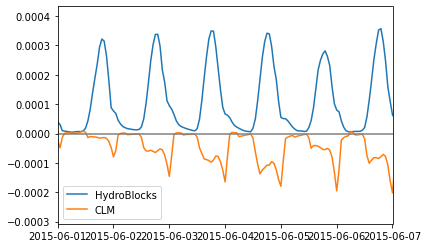

In [28]:
plt.plot(nateHTG_orig['time'],np.squeeze(nateHTG_orig.thlpqp.values))
plt.plot(hourlyCLM['time'],np.squeeze(hourlyCLM.THLPQP_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])
plt.xlim([datetime.date(2015,6,1), datetime.date(2015,6,7)])
plt.axhline(0,color='gray')

In [29]:
# THLPQP_CLUBB
#  K kg/kg in both
#  ISSUE: looks like almost a sign offset between the CLM computed moments and HydroBlocks
#         Also opposite of what CLUBB computes on its own. 
nateHTG_orig['thlpqp'].values = hourlyCLM.THLPQP_CLUBB.values 



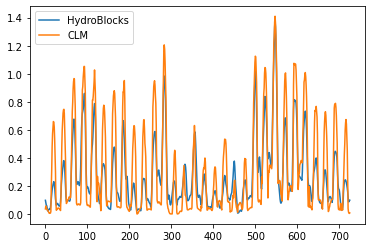

In [30]:
plt.plot(np.squeeze(nateHTG_orig.wp2.values))
plt.plot(np.squeeze(hourlyCLM.WP2_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])

In [31]:
# WP2_CLUBB
#   m2/s2 in both
nateHTG_orig['wp2'].values = hourlyCLM.WP2_CLUBB.values


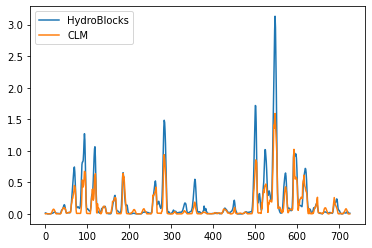

In [32]:
plt.plot(np.squeeze(nateHTG_orig.wp4.values))
plt.plot(np.squeeze(hourlyCLM.WP4_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])

In [33]:
# WP4_CLUBB
#  m4/s4 in both
nateHTG_orig['wp4'].values = hourlyCLM.WP4_CLUBB.values


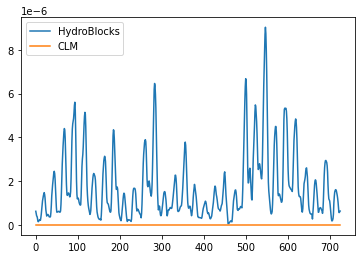

In [34]:
plt.plot(np.squeeze(nateHTG_orig.wp2thetap.values))
plt.plot(np.squeeze(hourlyCLM.WP2THLP_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])


In [35]:
# WP2THP_CLUBB
# K m2/s2 in both 
nateHTG_orig['wp2thetap'].values = hourlyCLM.WP2THLP_CLUBB.values


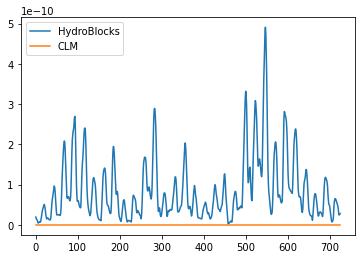

In [36]:
plt.plot(np.squeeze(nateHTG_orig.wp2qp.values))
plt.plot(np.squeeze(hourlyCLM.WP2QP_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])



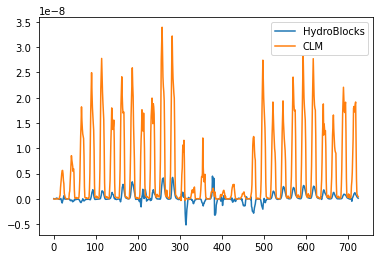

In [37]:
plt.plot(np.squeeze(nateHTG_orig.wpqp2.values))
plt.plot(np.squeeze(hourlyCLM.WPQP2_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])


In [38]:
# WP2QP_CLUBB
#  kg/kg m2/s2 in both 
nateHTG_orig['wp2qp'].values = hourlyCLM.WP2QP_CLUBB.values


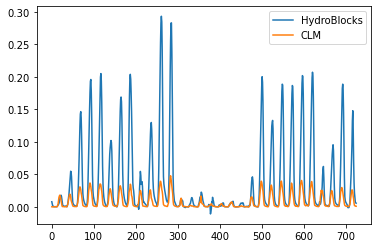

In [39]:
plt.plot(np.squeeze(nateHTG_orig.wpthetap2.values))
plt.plot(np.squeeze(hourlyCLM.WPTHLP2_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])


In [40]:
## WPTHLP2_CLUBB
#   K2 m/s?
nateHTG_orig['wpthetap2'].values = hourlyCLM.WPTHLP2_CLUBB.values


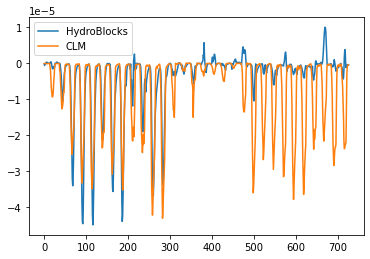

In [41]:
plt.plot(np.squeeze(nateHTG_orig.wpthetapqp.values))
plt.plot(np.squeeze(hourlyCLM.WPTHLPQP_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])

In [42]:
## WPTHLPQP
#   K kg/kg m/s

nateHTG_orig['wpthetapqp'].values = hourlyCLM.WPTHLPQP_CLUBB.values

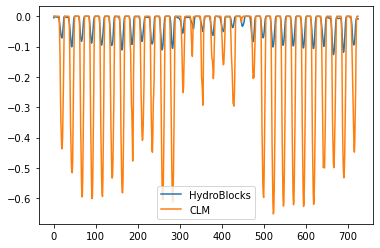

In [43]:
plt.plot(np.squeeze(nateHTG_orig.wp3.values))
plt.plot(np.squeeze(hourlyCLM.WP3_CLUBB.values))
plt.legend(['HydroBlocks','CLM'])



In [44]:
## WP3
#  m3/s3
nateHTG_orig['wp3'].values = hourlyCLM.WP3_CLUBB.values

In [45]:
# Drop upwp and vpwp 
nateHTG_orig = nateHTG_orig.drop_vars('upwp')
nateHTG_orig = nateHTG_orig.drop_vars('vpwp')

In [46]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/NoMoments-SrfFluxAvg_withCTSMmods/'
fileName = savePath+'clasp-htg.IrrOn.SrfFluxAvg.nc'

nateHTG_orig.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')


In [47]:
nateHTG_orig.time.values

array(['2015-05-31T00:02:52.705078108', '2015-05-31T01:03:22.148437478',
       '2015-05-31T02:03:50.273437478', '2015-05-31T03:02:52.705078108',
       '2015-05-31T04:03:22.148437478', '2015-05-31T05:03:50.273437478',
       '2015-05-31T06:02:52.705078108', '2015-05-31T07:03:22.148437478',
       '2015-05-31T08:03:50.273437478', '2015-05-31T09:02:52.705078108',
       '2015-05-31T10:03:22.148437478', '2015-05-31T11:03:50.273437478',
       '2015-05-31T12:02:52.705078108', '2015-05-31T13:03:22.148437478',
       '2015-05-31T14:03:50.273437478', '2015-05-31T15:02:52.705078108',
       '2015-05-31T16:03:22.148437478', '2015-05-31T17:03:50.273437478',
       '2015-05-31T18:02:52.705078108', '2015-05-31T19:03:22.148437478',
       '2015-05-31T20:03:50.273437478', '2015-05-31T21:02:52.705078108',
       '2015-05-31T22:03:22.148437478', '2015-05-31T23:03:50.273437478',
       '2015-06-01T00:00:00.000000000', '2015-06-01T01:00:29.443359370',
       '2015-06-01T01:59:30.556640630', '2015-06-01